In [2]:
from PIL import Image
import numpy as np

In [10]:
# thinking in terms of groups
# or objects and duplication

In [5]:
image = Image.open("./1821412288055968247-2.jpg")
width = image.width
height = image.height
pixels = np.array(image).reshape(-1, 3)
pixels.shape

FileNotFoundError: [Errno 2] No such file or directory: './1821412288055968247-2.jpg'

In [ ]:
np.random.seed(42)
rand_indices = np.random.randint(0, pixels.shape[0], 10)
rand_pixels = pixels[rand_indices]
rand_pixels.shape, rand_pixels.T.shape # reshape wouldn't work bc row major traversal

((10, 3), (3, 10))

In [ ]:
diff = pixels.reshape(-1, 3, 1) - rand_pixels.T.reshape(1, 3, -1)
diff.shape

(1011712, 3, 10)

In [6]:
# interpretation of objects is very important here
# i have 10 vectors for each pixel and i want to get the length of each vector
norms = np.linalg.norm(diff, axis=1)
norms.shape

NameError: name 'diff' is not defined

In [7]:
# sanity check of norms with normal broadcasting reshape operation
sanitycheck = np.linalg.norm(pixels.reshape(-1, 1, 3) - rand_pixels, axis=2)
norms.shape, sanitycheck.shape, np.allclose(norms, sanitycheck)

NameError: name 'pixels' is not defined

In [8]:
closest_centroid_idx = np.argmin(norms, axis=1)
new_centroids = np.array([pixels[closest_centroid_idx == centroid_idx].mean(axis=0) for centroid_idx in range(10)])
new_centroids.shape

NameError: name 'norms' is not defined

In [3]:
# kmeans loop

cluster_count = 2
image = Image.open("./bald/20240823_000408.jpg")
# image = image.convert("RGB")
width = image.width
height = image.height
pixels = np.array(image).reshape(-1, 3, 1)
np.random.seed(14)
initial_centroids = pixels[np.random.randint(0, pixels.shape[0], cluster_count)]
centroids = initial_centroids
closest_centroid_indices = None

losses = []
for _ in range(15):
  centroids_formatted = centroids.T.reshape(1, 3, cluster_count)
  diffs = pixels - centroids_formatted
  norms = np.linalg.norm(diffs, axis=1)
  
  loss = np.min(norms, axis=1).mean()
  losses.append(loss)

  closest_centroid_indices = np.argmin(norms, axis=1)
  # new_centroids = []
  # for centroid_idx in range(cluster_count):
  #   mask = closest_centroid_indices == centroid_idx
  #   if np.any(mask):
  #     new_centroids.append(pixels[mask].mean(axis=0))
  #   else:
  #     new_centroids.append(pixels[np.random.randint(0, pixels.shape[0])])
  # centroids = np.array(new_centroids)


  centroids = np.array([pixels[closest_centroid_indices == centroid_idx].mean(axis=0) if np.any(closest_centroid_indices == centroid_idx) else pixels[np.random.randint(0, pixels.shape[0])] for centroid_idx in range(cluster_count)])
  # centroids = np.array([pixels[closest_centroid_indices == centroid_idx].mean(axis=0) for centroid_idx in range(cluster_count)])

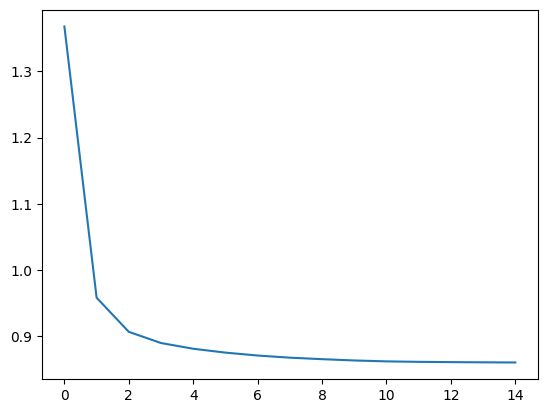

In [24]:
import matplotlib.pyplot as plt

plt.plot(np.log10(np.array(losses)))

In [4]:
pixel_replaced = centroids[closest_centroid_indices].reshape(height, width, 3)
Image.fromarray(np.uint8(pixel_replaced)).save("kmeans.jpg")

In [17]:
im = Image.fromarray(np.uint8(pixel_replaced))
im.resize((image.width // 500, image.height // 500)).save("kmeans_resized.jpg")

In [19]:
bald = Image.open("./bald/test.png")
bald.resize((bald.width // 200, bald.height // 200)).save("bald_resized.png")